# Identifying sentences that convey meaningful semantic relation between entities within the sentence - Exploratory Data Analysis (EDA)


The objective of this notebook is to present a brief exploratory data analysis (EDA) of the sampled dataset that will be later used.

In [70]:
from IPython.display import Image
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

## Part 1: Named Entities EDA

The Named Entities analysis was conducted during the dataset generation.
The distribution of named entity occurances, along with their corresponding labels, follows a heavy-tail distibution pattern.

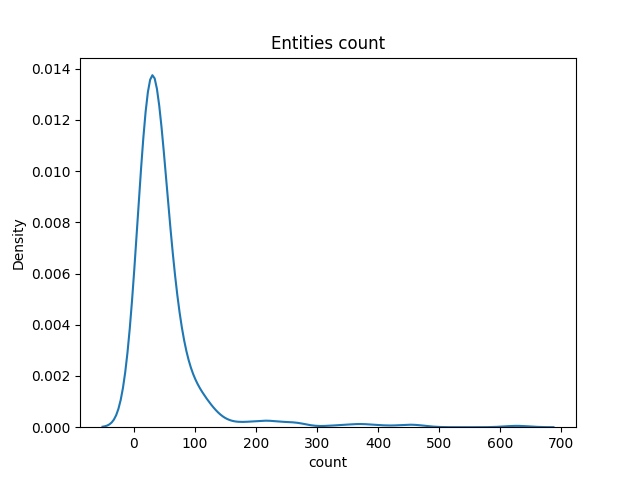

In [71]:
Image(filename='../part1/script_output/sampled_data_stats/entities_count.png')

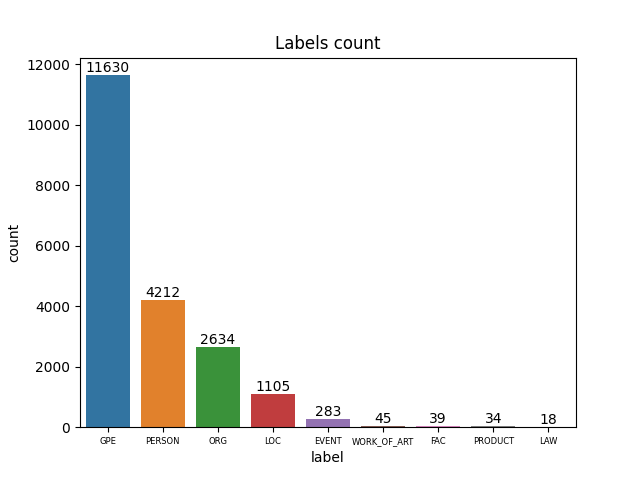

In [72]:
Image(filename='../part1/script_output/sampled_data_stats/labels_count.png')

We can see that Named-entities pairs follow a heavy-tail distibution as well:

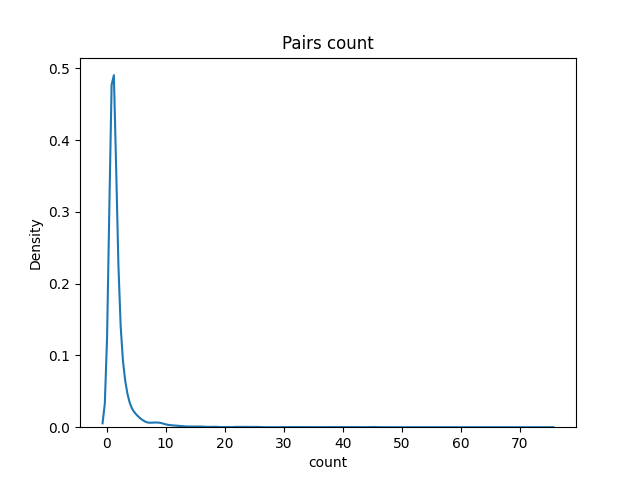

In [73]:
Image(filename='../part1/script_output/sampled_data_stats/pairs_count.png')

The occurrences of the paired labels can be visualized using a heatmap. For instance, it can be observed that pairs labeled as GPE-GPE (geopolitical entities) are the most common.

Other frequent combinations include: GPE-LOC (geopolitical entity - location), GPE-ORG (geopolitical entity - organization), GPE-PERSON, LOC-LOC (location - location), ORG-ORG (organization - organization), ORG-PERSON, and PERSON-PERSON.

Note: In this context, each pair is counted twice due to the symmetric nature of the relation. For example, a pair consisting of GPE and PERSON will be counted once as (GPE, PERSON) and then again as (PERSON, GPE).

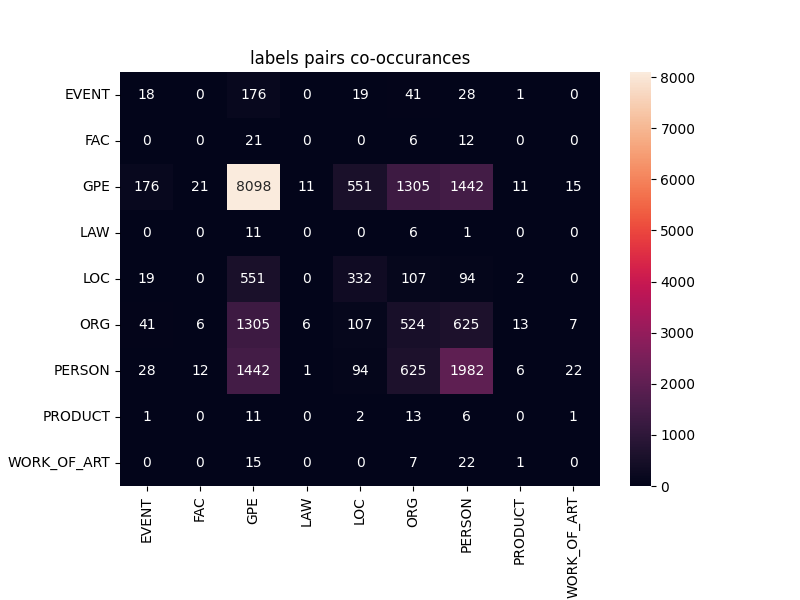

In [74]:
Image(filename='../part1/script_output/sampled_data_stats/pairs_labels_count.png')

## Part 3: Exploring the Mutual Information (MI) Score

### Exploring the MI for the entire dataset

In [75]:
dataset_path = '../part1/script_output/data.csv'
df = pd.read_csv(dataset_path)

In [76]:
df['mi_score'].describe()

count    10000.000000
mean         0.002350
std          0.006163
min         -0.001461
25%          0.000138
50%          0.000399
75%          0.001610
max          0.044308
Name: mi_score, dtype: float64

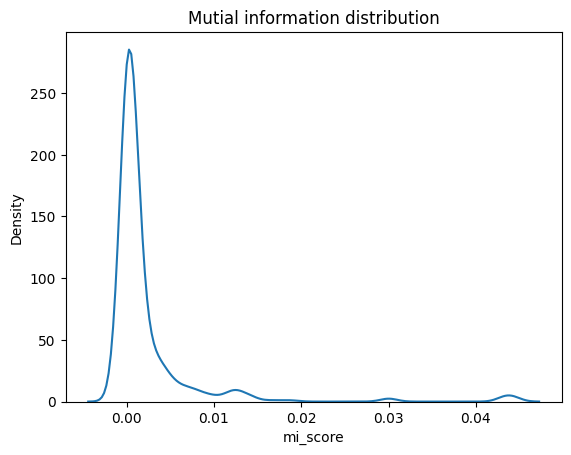

In [77]:
sns.kdeplot(data=df['mi_score'])
plt.title('Mutial information distribution');

In [78]:
sorted_df = df.sort_values(by='mi_score', ascending=True)

In [79]:
print(f'Pair with negative MI (joint probability < the product of the individual probabilities) so the variables are less dependent: {(len(df[df["mi_score"] < 0])/len(df)) :.2%}')
print(f'Pair with positive MI: {(len(df[df["mi_score"] > 0])/len(df)) :.2%}')
print(f'Pair with 0 MI: {(len(df[df["mi_score"] == 0])/len(df)) :.2%}')

Pair with negative MI (joint probability < the product of the individual probabilities) so the variables are less dependent: 13.70%
Pair with positive MI: 86.29%
Pair with 0 MI: 0.01%


### Exploring the MI for each labels-pair

I decided to display only the top 8 label pairs in the dataset for mutual information (MI) analysis. As expected, we often observe a power-law distribution, with an additional cluster representing the pairs that frequently appeared together.

In [80]:
def plot_type_mi_KDE_plot(df, type1, type2):
    df1 = df[( (df['label1'] == type1) & (df['label2'] == type2) ) | ( (df['label2'] == type1) & (df['label1'] == type2) )]
    sns.kdeplot(data=df1['mi_score'])
    plt.title(f'Mutial information distribution for labels: {type1}-{type2}')
    print(df1['mi_score'].describe())

count    4049.000000
mean        0.002200
std         0.004568
min        -0.001461
25%         0.000099
50%         0.000536
75%         0.002602
max         0.043293
Name: mi_score, dtype: float64


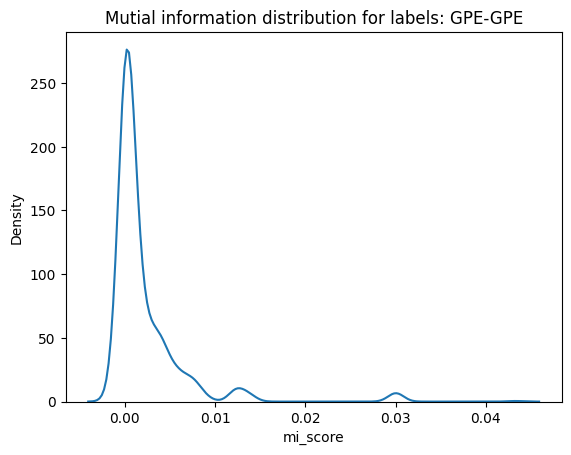

In [81]:
plot_type_mi_KDE_plot(df, 'GPE', 'GPE')

count    551.000000
mean       0.000583
std        0.001650
min       -0.000676
25%       -0.000054
50%        0.000161
75%        0.000532
max        0.007709
Name: mi_score, dtype: float64


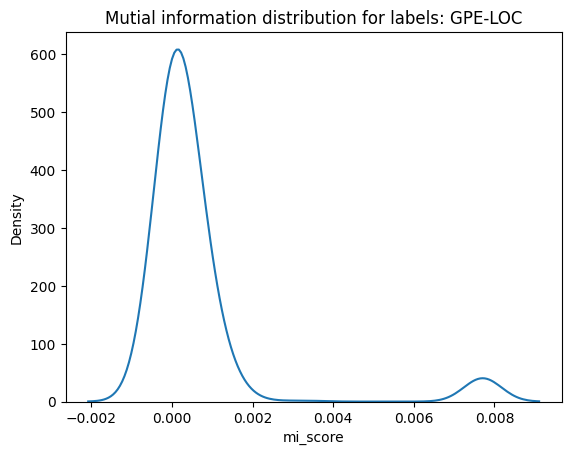

In [82]:
plot_type_mi_KDE_plot(df, 'GPE', 'LOC')

count    1305.000000
mean        0.003728
std         0.009897
min        -0.000862
25%         0.000166
50%         0.000344
75%         0.001071
max         0.043293
Name: mi_score, dtype: float64


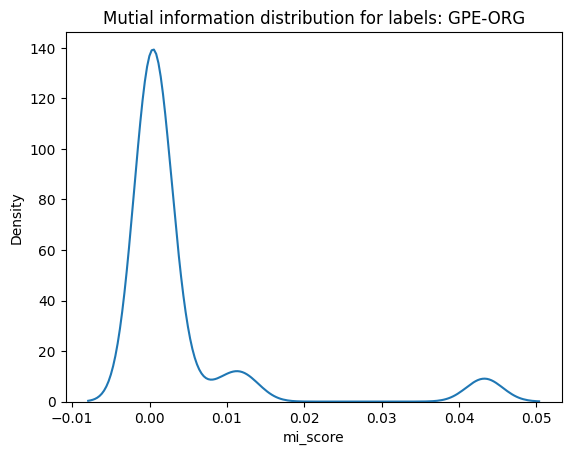

In [83]:
plot_type_mi_KDE_plot(df, 'GPE', 'ORG')

count    1442.000000
mean        0.000542
std         0.001006
min        -0.001173
25%         0.000072
50%         0.000248
75%         0.000574
max         0.006340
Name: mi_score, dtype: float64


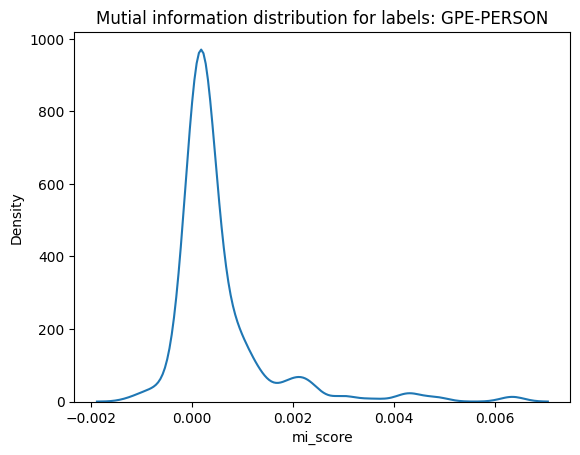

In [84]:
plot_type_mi_KDE_plot(df, 'GPE', 'PERSON')

count    166.000000
mean       0.005454
std        0.005683
min       -0.000027
25%        0.000984
50%        0.003662
75%        0.014457
max        0.014457
Name: mi_score, dtype: float64


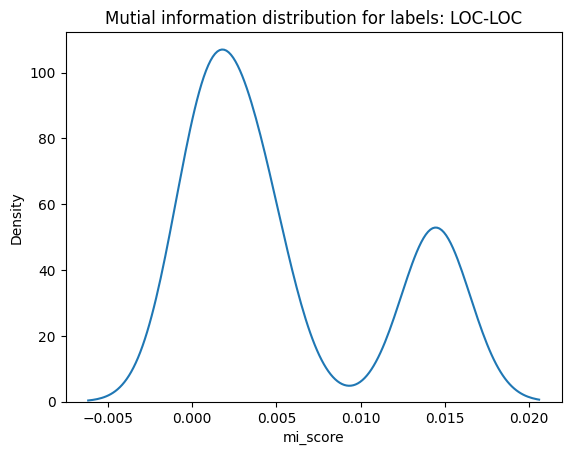

In [85]:
plot_type_mi_KDE_plot(df, 'LOC', 'LOC')

count    262.000000
mean       0.002492
std        0.003988
min       -0.000140
25%        0.000315
50%        0.000808
75%        0.002372
max        0.016759
Name: mi_score, dtype: float64


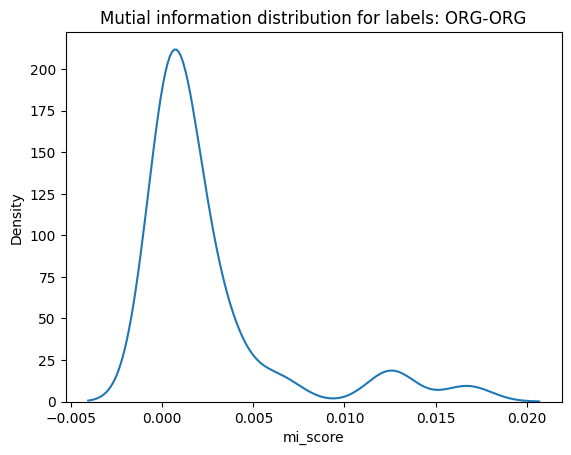

In [86]:
plot_type_mi_KDE_plot(df, 'ORG', 'ORG')

count    625.000000
mean       0.001193
std        0.002725
min       -0.000659
25%        0.000257
50%        0.000427
75%        0.001084
max        0.016759
Name: mi_score, dtype: float64


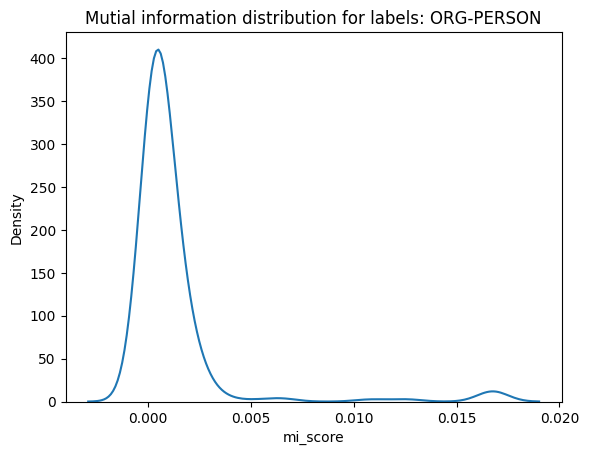

In [87]:
plot_type_mi_KDE_plot(df, 'ORG', 'PERSON')

count    991.000000
mean       0.005766
std        0.011171
min       -0.000189
25%        0.000337
50%        0.000934
75%        0.005074
max        0.044308
Name: mi_score, dtype: float64


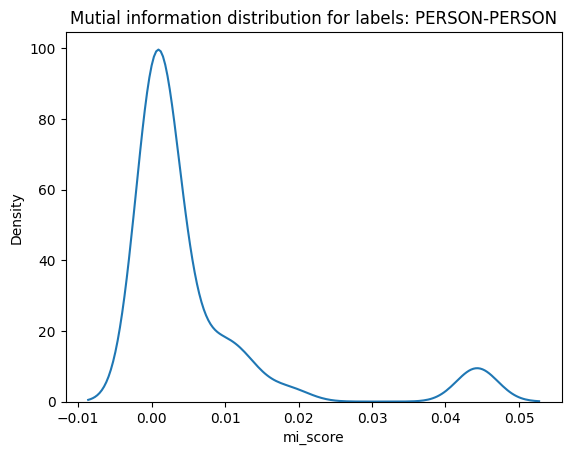

In [88]:
plot_type_mi_KDE_plot(df, 'PERSON', 'PERSON')